# Problem Statement

#### Predict tips given by customers in Restaurants

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
df=pd.read_csv('tips.csv',index_col=0)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [5]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [8]:
df['size']=df['size'].astype('float64')

In [9]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size          float64
dtype: object

### Observation
1.There are no null values in these dataset


2.There are 4 columns of obkect datatype ,2 of float and 1 of int

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [12]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
cols=df.columns

In [15]:
for i in cols:
    print(i,df[i].unique(),sep='\n----------------------\n')

total_bill
----------------------
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.49 21.5
 12.66 16.21 17.51 

### Observation
1.There are only 2 unique values in sex,2 in smoker ,4 in day,2 in time

2.So sex, smoker,day,time are categorical data and can be converted in numerical using get_dummies

## Data Visualization

In [16]:
cols

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

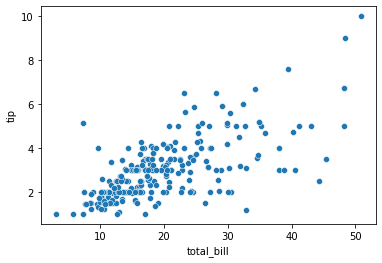

In [19]:
sns.scatterplot(x='total_bill',y='tip',data=df)

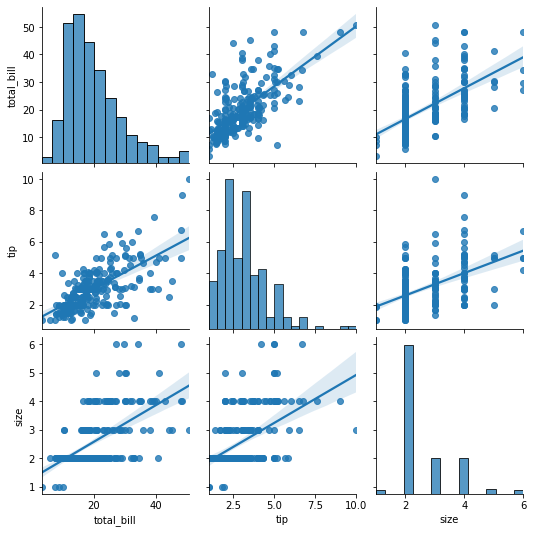

In [20]:
sns.pairplot(df,kind='reg') 

<AxesSubplot:xlabel='sex', ylabel='tip'>

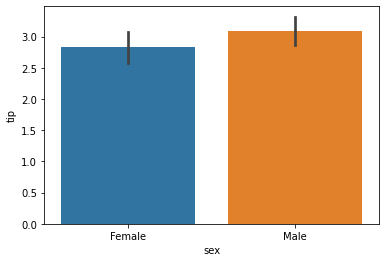

In [21]:
sns.barplot(x='sex', y='tip', data = df)


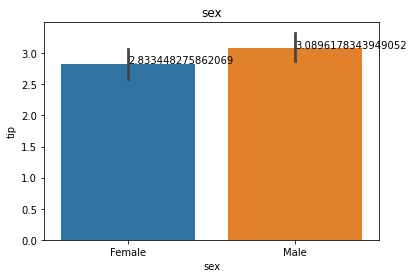

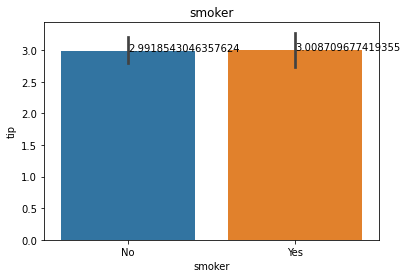

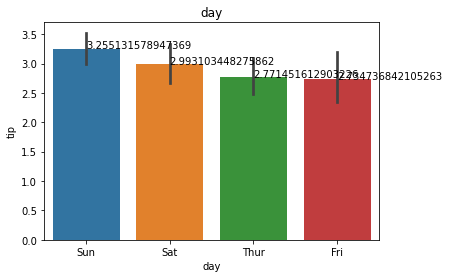

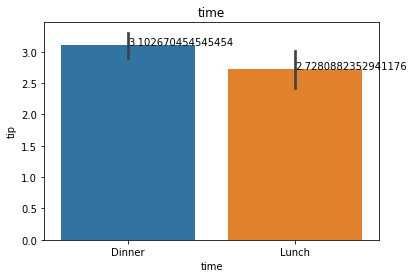

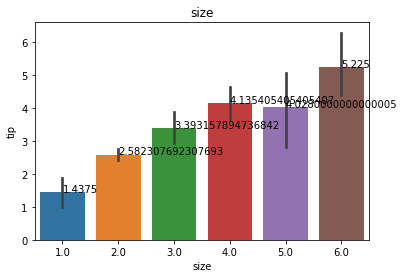

In [26]:
for col in ['sex', 'smoker', 'day', 'time', 'size']:
    f=sns.barplot(x=col,y='tip',data=df)
    plt.title(col)
    for i in f.patches:
        x=i.get_x() + i.get_width()/2
        y=i.get_y() + i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()

### Observation
1.Tips have given more by Male as compaed to Females

2.Tip is given at dinnet time more than lunch time

3.Tip is more on Sunday specially.

#### Converting categorical data in numerical data

In [29]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Male'], dtype='object')

In [27]:
df['Male'] = pd.get_dummies(df['sex'],drop_first=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0
1,10.34,1.66,Male,No,Sun,Dinner,3.0,1
2,21.01,3.50,Male,No,Sun,Dinner,3.0,1
3,23.68,3.31,Male,No,Sun,Dinner,2.0,1
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0


In [28]:
df['smoker']=pd.get_dummies(df['smoker'],drop_first=True)
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male
0,16.99,1.01,Female,0,Sun,Dinner,2.0,0
1,10.34,1.66,Male,0,Sun,Dinner,3.0,1
2,21.01,3.50,Male,0,Sun,Dinner,3.0,1
3,23.68,3.31,Male,0,Sun,Dinner,2.0,1
4,24.59,3.61,Female,0,Sun,Dinner,4.0,0


In [30]:
pd.get_dummies(df['time'])


,Dinner,Lunch
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
239,1,0
240,1,0
241,1,0
242,1,0


In [38]:
df['Dinner'] = df.time.map({ 'Dinner' : 1, 'Lunch' : 0})
df['Dinner'].unique()

array([1, 0], dtype=int64)

In [39]:
df.drop(['dinner'],axis=1)

,total_bill,tip,sex,smoker,day,time,size,Male,Dinner
0,16.99,1.01,Female,0,Sun,Dinner,2.0,0,1
1,10.34,1.66,Male,0,Sun,Dinner,3.0,1,1
2,21.01,3.50,Male,0,Sun,Dinner,3.0,1,1
3,23.68,3.31,Male,0,Sun,Dinner,2.0,1,1
4,24.59,3.61,Female,0,Sun,Dinner,4.0,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3.0,1,1
240,27.18,2.00,Female,1,Sat,Dinner,2.0,0,1
241,22.67,2.00,Male,1,Sat,Dinner,2.0,1,1
242,17.82,1.75,Male,0,Sat,Dinner,2.0,1,1


In [40]:
df['day'] = df.day.map({ 'Sun' : 3, 'Sat' : 2, 'Thur' : 0, 'Fri' : 1})

In [41]:
df

,total_bill,tip,sex,smoker,day,time,size,Male,dinner,Dinner
0,16.99,1.01,Female,0,3,Dinner,2.0,0,0,1
1,10.34,1.66,Male,0,3,Dinner,3.0,1,0,1
2,21.01,3.50,Male,0,3,Dinner,3.0,1,0,1
3,23.68,3.31,Male,0,3,Dinner,2.0,1,0,1
4,24.59,3.61,Female,0,3,Dinner,4.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,2,Dinner,3.0,1,0,1
240,27.18,2.00,Female,1,2,Dinner,2.0,0,0,1
241,22.67,2.00,Male,1,2,Dinner,2.0,1,0,1
242,17.82,1.75,Male,0,2,Dinner,2.0,1,0,1


In [42]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,dinner,Dinner
0,16.99,1.01,Female,0,3,Dinner,2.0,0,0,1
1,10.34,1.66,Male,0,3,Dinner,3.0,1,0,1
2,21.01,3.50,Male,0,3,Dinner,3.0,1,0,1
3,23.68,3.31,Male,0,3,Dinner,2.0,1,0,1
4,24.59,3.61,Female,0,3,Dinner,4.0,0,0,1


In [ ]:
df.drop(['sex','time'],axis=1, inplace=True)

In [53]:
df.head()

,total_bill,tip,smoker,day,size,Male,Dinner
0,16.99,1.01,0,3,2.0,0,1
1,10.34,1.66,0,3,3.0,1,1
2,21.01,3.50,0,3,3.0,1,1
3,23.68,3.31,0,3,2.0,1,1
4,24.59,3.61,0,3,4.0,0,1


In [ ]:
df.drop(['dinner'],axis=1,inplace=True)

In [55]:
df.head()

,total_bill,tip,smoker,day,size,Male,Dinner
0,16.99,1.01,0,3,2.0,0,1
1,10.34,1.66,0,3,3.0,1,1
2,21.01,3.50,0,3,3.0,1,1
3,23.68,3.31,0,3,2.0,1,1
4,24.59,3.61,0,3,4.0,0,1


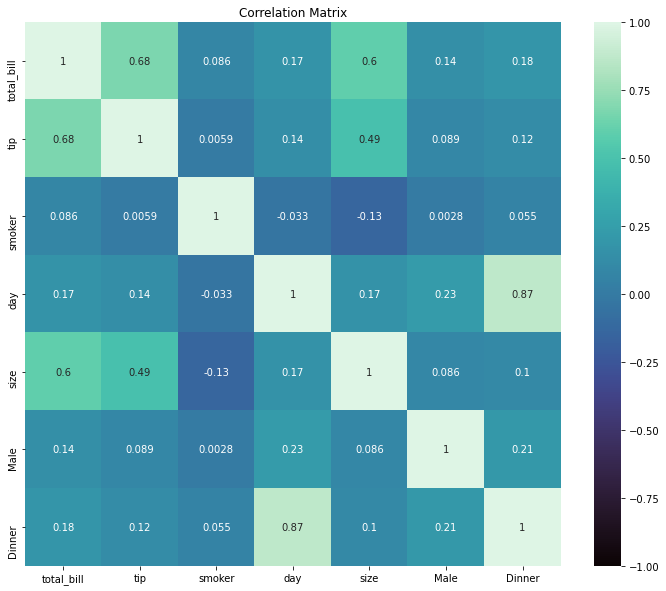

In [56]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

In [57]:
X = df.drop(['tip','smoker'], axis=1)
Y = df['tip']

In [58]:
X.head()

,total_bill,day,size,Male,Dinner
0,16.99,3,2.0,0,1
1,10.34,3,3.0,1,1
2,21.01,3,3.0,1,1
3,23.68,3,2.0,1,1
4,24.59,3,4.0,0,1


In [59]:
Y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### Splitting Data into train and test dataset

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state = 101)


### Training The Model

In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
model = LinearRegression().fit(xtrain, ytrain)


In [64]:
model.score(xtest,ytest)*100


31.098026220401554

In [65]:
pd.DataFrame(model.coef_,columns=['Coef'],index= X.columns).sort_values(by='Coef',ascending=False)


,Coef
size,0.193931
total_bill,0.102633
day,-0.005528
Male,-0.024810
Dinner,-0.116048


In [67]:
from sklearn.ensemble import RandomForestRegressor


In [68]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [69]:
model_rf.fit(xtrain, ytrain)


RandomForestRegressor(random_state=0)

In [70]:
model_rf.score(xtest,ytest)*100


24.320674731403702